In [1]:
import os
import tensorflow as tf

# Set CUDA device order and visible devices
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2,3,4,5,6,7,8,9"

# Set the device
device = '/cpu:0'
if tf.config.experimental.list_physical_devices('GPU'):
    try:
        # Restrict TensorFlow to only use the second GPU
        gpus = tf.config.experimental.list_physical_devices('GPU')
        if gpus:
            tf.config.experimental.set_visible_devices(gpus[9], 'GPU')
            device = '/gpu:9'
    except RuntimeError as e:
        print(e)

print("device", device)


2024-08-15 18:04:14.728191: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-15 18:04:14.742647: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-15 18:04:14.755918: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-15 18:04:14.759907: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-15 18:04:14.772104: I tensorflow/core/platform/cpu_feature_guar

device /gpu:9


In [2]:
import h5py 
import numpy as np
import matplotlib.pyplot as plt

# Load HDF5 data
h5_filename = '/home/da886/ElectronCountingProject/Small Building Blocks/Data Generated/50K_3electronsOnlyImages_smaller_negative_paddings.h5'
with h5py.File(h5_filename, 'r') as f:
    images = np.array(f['images'])
    centers = np.array(f['centers_training'])


In [3]:
import h5py
import numpy as np

# Function to sort centers from top-left to bottom-right
def sort_centers(centers):
    # Sort by y first, then by x
    return centers[np.lexsort((centers[:, 0], centers[:, 1]))]

# Sort the centers for each image
sorted_centers = np.array([sort_centers(image_centers[:, 1:3]) for image_centers in centers])




In [6]:
k = np.random.randint(0,len(sorted_centers))
sorted_centers[k],centers[k]

(array([[ 4.5, 23.5],
        [60.5, 27.5],
        [43.5, 53.5]], dtype=float32),
 array([[ 1. , 60.5, 27.5],
        [ 1. , 43.5, 53.5],
        [ 1. ,  4.5, 23.5]], dtype=float32))

## Raw Data


### Sample image with midpoints

for better analysis, the index has been set to a specific example: 2 in this case

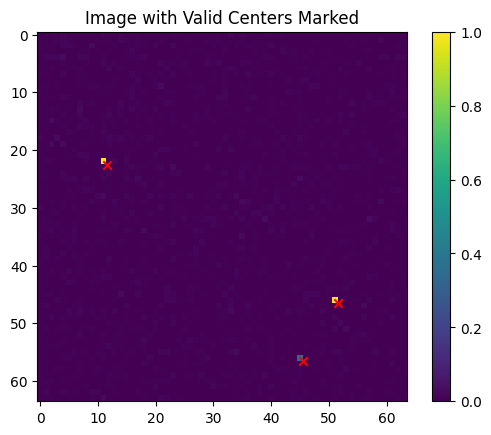

In [11]:
a = np.random.randint(0, len(images))
# a =2
image = images[a]
centerss = centers[a]

# Plot the image with valid centers
plt.imshow(image, )
valid_centers = centerss[centerss[:, 0] == 1]
for center in valid_centers:
    plt.scatter(center[1], center[2], c='red', marker='x')  # Note: center[1] is x and center[2] is y
plt.title('Image with Valid Centers Marked')
plt.colorbar()
plt.show()


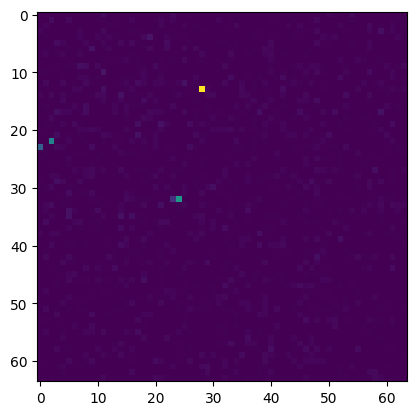

In [10]:
### sample image without centers
b = np.random.randint(0, len(images))
# b = 2
plt.imshow(images[b] )

(array([3.820596e+06, 2.620390e+05, 7.540000e+03, 3.810000e+02,
        6.400000e+01, 1.230000e+02, 8.800000e+01, 1.230000e+02,
        8.400000e+01, 1.400000e+02, 1.390000e+02, 7.500000e+01,
        1.390000e+02, 8.500000e+01, 1.450000e+02, 1.160000e+02,
        1.480000e+02, 1.070000e+02, 1.550000e+02, 1.310000e+02,
        1.360000e+02, 1.320000e+02, 8.500000e+01, 1.470000e+02,
        8.200000e+01, 1.220000e+02, 8.500000e+01, 9.600000e+01,
        7.000000e+01, 8.200000e+01, 9.400000e+01, 5.500000e+01,
        9.500000e+01, 6.300000e+01, 8.100000e+01, 5.500000e+01,
        8.500000e+01, 6.000000e+01, 7.600000e+01, 4.600000e+01,
        7.700000e+01, 8.100000e+01, 5.000000e+01, 6.900000e+01,
        5.000000e+01, 7.600000e+01, 5.400000e+01, 7.500000e+01,
        2.800000e+01, 6.000000e+01, 6.400000e+01, 4.900000e+01,
        5.300000e+01, 3.800000e+01, 5.900000e+01, 2.600000e+01,
        4.300000e+01, 4.500000e+01, 5.000000e+01, 3.000000e+01,
        4.000000e+01, 2.900000e+01, 2.40

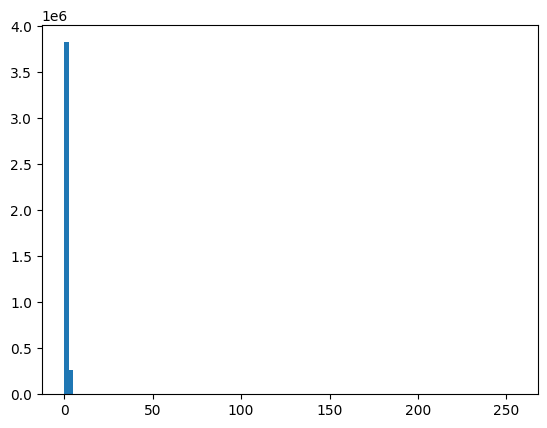

In [12]:
#### Histogram of the first n(1000 in this case) images
# c = np.random.randint(0, len(images))
# c= 2
plt.hist(images[0:1000].flatten(),bins=100)

In [9]:
#### How many centers are in the nth image?
d = np.random.randint(0, len(centers))
# d= 2
centers[d]

array([[ 1. , 55.5,  8.5],
       [ 1. , 39.5, 41.5],
       [ 1. , 51.5, 57.5]], dtype=float32)

(array([[3., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 1., 0., 1.]]),
 array([ 1.        ,  7.1500001 , 13.30000019, 19.45000076, 25.60000038,
        31.75      , 37.90000153, 44.04999924, 50.20000076, 56.34999847,
        62.5       ]),
 <a list of 3 BarContainer objects>)

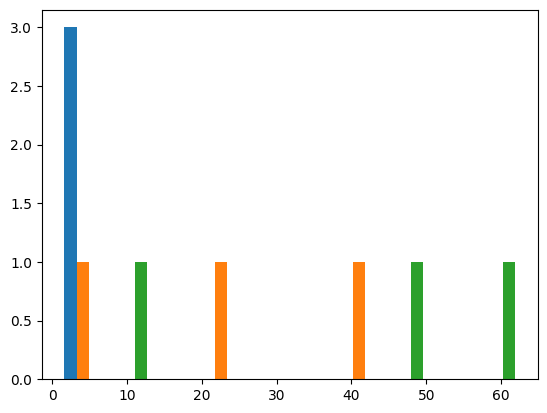

In [10]:
e = np.random.randint(0, len(centers))
# e= 2
plt.hist(centers[e])

In [56]:
#### Statistics of the images
np.max(images), np.min(images), np.mean(images), np.std(images)

(255, 0, 0.6716084716796875, 3.932534231716182)

In [57]:
np.max(centers), np.min(centers)

(63.5, 1.0)

## Normalized Data

In [3]:


# # Calculate the maximum pixel value for each image
# max_values = [np.max(image) for image in images]

# # Analyze the distribution of these maximum values
# percentile_95 = np.percentile(max_values, 90)

# # Use this 95th percentile as the custom maximum value for normalization
# custom_max = percentile_95

# # Normalize the images using this custom maximum value
# normalized_images = images / custom_max




In [58]:
# plt.hist(normalized_images[0:100000].flatten(),bins=100)

In [101]:
# custom_max

239.0

In [132]:
# np.max(normalized_images), np.min(normalized_images)

(1.0669456066945606, 0.0)

In [12]:


# normalized_images = (images+1e-9)/9.26
# normalized_centers = centers /  [64,64,64]
# normalized_midpoints =normalized_centers[:,:, 1:]
# normalized_probabilities = normalized_centers[:,:, :-2]
# normalized_midpoints = tf.expand_dims(normalized_midpoints,axis=1)
# normalized_probabilities = tf.expand_dims(normalized_probabilities,axis =1)

normalized_images = (images+1e-9)/9.26
normalized_centers = sorted_centers / [64, 64]
normalized_midpoints =normalized_centers
normalized_probabilities = centers[:, :, :1] / 64
normalized_midpoints = tf.expand_dims(normalized_midpoints,axis=1)
normalized_probabilities = tf.expand_dims(normalized_probabilities,axis =1)

2024-08-15 18:04:58.935339: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79078 MB memory:  -> device: 9, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:cf:00.0, compute capability: 8.0


In [5]:
u = np.random.randint(0, len(normalized_images))
np.max(normalized_images[u]), np.min(normalized_images[u])

(17.710583153455723, 1.0799136069114472e-10)

In [8]:
np.max(normalized_centers), np.min(normalized_centers)

(0.9921875, 0.0234375)

In [14]:
normalized_centers[3],centers[3]

(array([[0.8671875, 0.1953125],
        [0.7734375, 0.2578125],
        [0.9765625, 0.4296875]]),
 array([[ 1. , 55.5, 12.5],
        [ 1. , 49.5, 16.5],
        [ 1. , 62.5, 27.5]], dtype=float32))

In [9]:
normalized_images.shape, normalized_centers.shape, normalized_midpoints.shape, normalized_probabilities.shape

((30000, 64, 64),
 (30000, 3, 2),
 TensorShape([30000, 1, 3, 2]),
 TensorShape([30000, 1, 3, 1]))

In [10]:
normalized_probabilities 

<tf.Tensor: shape=(50000, 1, 3, 1), dtype=float64, numpy=
array([[[[0.015625],
         [0.015625],
         [0.015625]]],


       [[[0.015625],
         [0.015625],
         [0.015625]]],


       [[[0.015625],
         [0.015625],
         [0.015625]]],


       ...,


       [[[0.015625],
         [0.015625],
         [0.015625]]],


       [[[0.015625],
         [0.015625],
         [0.015625]]],


       [[[0.015625],
         [0.015625],
         [0.015625]]]])>

In [16]:
normalized_midpoints 

<tf.Tensor: shape=(50000, 1, 3, 2), dtype=float64, numpy=
array([[[[0.6328125, 0.1953125],
         [0.1015625, 0.5078125],
         [0.8359375, 0.7734375]]],


       [[[0.9296875, 0.0234375],
         [0.3203125, 0.1484375],
         [0.6640625, 0.7890625]]],


       [[[0.0390625, 0.0234375],
         [0.5234375, 0.2421875],
         [0.6796875, 0.4609375]]],


       ...,


       [[[0.8671875, 0.5078125],
         [0.8828125, 0.8203125],
         [0.8515625, 0.8984375]]],


       [[[0.9609375, 0.4921875],
         [0.4140625, 0.5703125],
         [0.5859375, 0.8984375]]],


       [[[0.3515625, 0.2421875],
         [0.6328125, 0.3671875],
         [0.9609375, 0.4765625]]]])>

In [13]:

split_idx = int(0.8 * len(normalized_images))
train_images, val_images = normalized_images[:split_idx], normalized_images[split_idx:]
train_midpoints, val_midpoints = normalized_midpoints[:split_idx], normalized_midpoints[split_idx:]
train_probabilities, val_probabilities = normalized_probabilities[:split_idx], normalized_probabilities[split_idx:]
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, {'x_probabilities_reshape':train_probabilities,'x_midpoints_reshape':train_midpoints}))
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, {'x_probabilities_reshape':val_probabilities,'x_midpoints_reshape':val_midpoints,}))

In [6]:
train_images

array([[[1.07991361e-10, 1.07991361e-10, 1.07991361e-10, ...,
         1.07991361e-01, 1.07991361e-10, 1.07991361e-10],
        [1.07991361e-10, 1.07991361e-10, 3.23974082e-01, ...,
         1.07991361e-10, 3.23974082e-01, 1.07991361e-10],
        [1.07991361e-10, 2.15982721e-01, 1.07991361e-10, ...,
         1.07991361e-10, 1.07991361e-10, 2.15982721e-01],
        ...,
        [1.07991361e-10, 1.07991361e-10, 3.23974082e-01, ...,
         1.07991361e-10, 1.07991361e-10, 1.07991361e-10],
        [1.07991361e-10, 1.07991361e-10, 1.07991361e-10, ...,
         1.07991361e-10, 1.07991361e-01, 1.07991361e-10],
        [1.07991361e-10, 1.07991361e-01, 2.15982721e-01, ...,
         1.07991361e-10, 1.07991361e-10, 1.07991361e-10]],

       [[1.07991361e-10, 1.07991361e-10, 3.23974082e-01, ...,
         1.07991361e-10, 2.15982721e-01, 2.15982721e-01],
        [5.39956804e-01, 1.07991361e-10, 1.07991361e-10, ...,
         1.07991361e-10, 1.07991361e-10, 1.07991361e-10],
        [1.07991361e-10, 

In [7]:
train_midpoints

<tf.Tensor: shape=(40000, 1, 3, 2), dtype=float64, numpy=
array([[[[0.6328125, 0.1953125],
         [0.1015625, 0.5078125],
         [0.8359375, 0.7734375]]],


       [[[0.9296875, 0.0234375],
         [0.3203125, 0.1484375],
         [0.6640625, 0.7890625]]],


       [[[0.0390625, 0.0234375],
         [0.5234375, 0.2421875],
         [0.6796875, 0.4609375]]],


       ...,


       [[[0.9296875, 0.1796875],
         [0.0234375, 0.6796875],
         [0.6796875, 0.7578125]]],


       [[[0.4296875, 0.0703125],
         [0.0546875, 0.1953125],
         [0.3046875, 0.7265625]]],


       [[[0.8359375, 0.1640625],
         [0.1796875, 0.3671875],
         [0.6171875, 0.6796875]]]])>

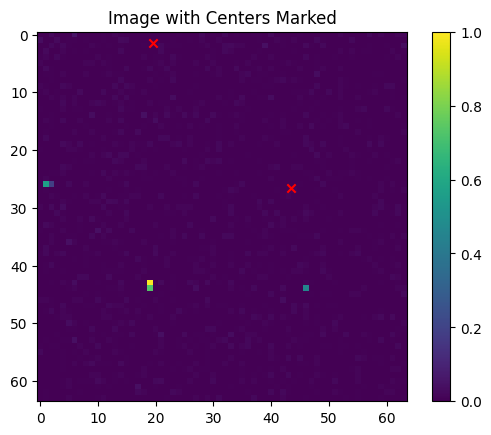

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Select a random image and corresponding centers
o = np.random.randint(0, len(train_images))
# o=2
imagess = val_images[o]
centersss = val_midpoints[o]*[64,64]

# Plot the image with centers
plt.imshow(imagess)

# Assuming centerss[:, 0] is x and centerss[:, 1] is y
for center in centersss:
    plt.scatter(center[1], center[0], c='red', marker='x')  # center[0] is x and center[1] is y

plt.title('Image with Centers Marked')
plt.colorbar()
plt.show()






In [18]:
val_midpoints[2]

<tf.Tensor: shape=(1, 3, 2), dtype=float64, numpy=
array([[[0.7734375, 0.4453125],
        [0.2109375, 0.7734375],
        [0.0703125, 0.8515625]]])>

In [15]:
train_dataset, val_dataset 

(<_TensorSliceDataset element_spec=(TensorSpec(shape=(64, 64), dtype=tf.float64, name=None), {'x_probabilities_reshape': TensorSpec(shape=(1, 3, 1), dtype=tf.float32, name=None), 'x_midpoints_reshape': TensorSpec(shape=(1, 3, 2), dtype=tf.float64, name=None)})>,
 <_TensorSliceDataset element_spec=(TensorSpec(shape=(64, 64), dtype=tf.float64, name=None), {'x_probabilities_reshape': TensorSpec(shape=(1, 3, 1), dtype=tf.float32, name=None), 'x_midpoints_reshape': TensorSpec(shape=(1, 3, 2), dtype=tf.float64, name=None)})>)

In [14]:
batch_size = 2000
train_dataset = train_dataset.shuffle(buffer_size=4000,reshuffle_each_iteration= True).batch(batch_size)
val_dataset = val_dataset.shuffle(buffer_size=4000).batch(batch_size)

In [7]:
train_dataset, val_dataset 

(<_BatchDataset element_spec=(TensorSpec(shape=(None, 64, 64), dtype=tf.float64, name=None), {'x_probabilities_reshape': TensorSpec(shape=(None, 1, 3, 1), dtype=tf.float32, name=None), 'x_midpoints_reshape': TensorSpec(shape=(None, 1, 3, 2), dtype=tf.float64, name=None)})>,
 <_BatchDataset element_spec=(TensorSpec(shape=(None, 64, 64), dtype=tf.float64, name=None), {'x_probabilities_reshape': TensorSpec(shape=(None, 1, 3, 1), dtype=tf.float32, name=None), 'x_midpoints_reshape': TensorSpec(shape=(None, 1, 3, 2), dtype=tf.float64, name=None)})>)

In [19]:
print(f"train_images shape is",train_images.shape) 
print(f"train_midpoints shape is",train_midpoints.shape)
print(f"train_probabilities shape is",train_probabilities.shape)

train_images shape is (40000, 64, 64)
train_midpoints shape is (40000, 1, 3, 2)
train_probabilities shape is (40000, 1, 3, 1)


In [20]:
print(f"val_images shape is",val_images.shape) 
print(f"val_midpoints shape is",val_midpoints.shape)
print(f"val_probabilities shape is",val_probabilities.shape)

val_images shape is (10000, 64, 64)
val_midpoints shape is (10000, 1, 3, 2)
val_probabilities shape is (10000, 1, 3, 1)


### Sample image with midpoints

for better analysis, the index has been set to a specific example: 2 in this case

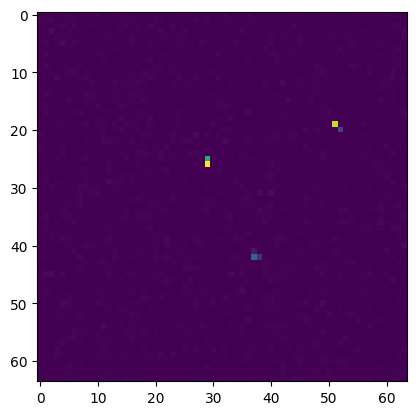

In [111]:
f = np.random.randint(0, len(train_images))
# f = 2
plt.imshow(train_images[f])

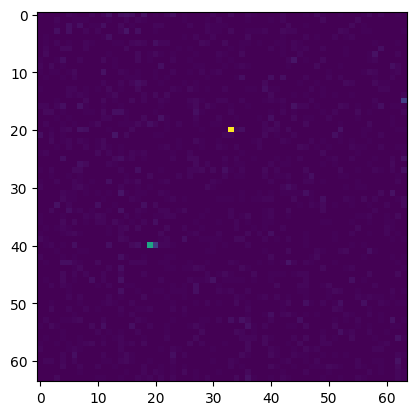

In [106]:
g = np.random.randint(0, len(val_images))
# g = 2
plt.imshow(val_images[g])

In [112]:
# h = np.random.randint(0, len(normalized_images))
h = 2
normalized_images[f],normalized_centers[f]

(array([[1.07991361e-10, 1.07991361e-10, 1.07991361e-10, ...,
         2.15982721e-01, 1.07991361e-01, 1.07991361e-10],
        [2.15982721e-01, 2.15982721e-01, 4.31965443e-01, ...,
         1.07991361e-10, 1.07991361e-10, 1.07991361e-10],
        [1.07991361e-10, 1.07991361e-10, 1.07991361e-10, ...,
         2.15982721e-01, 3.23974082e-01, 1.07991361e-10],
        ...,
        [1.07991361e-10, 1.07991361e-10, 1.07991361e-10, ...,
         1.07991361e-10, 1.07991361e-10, 1.07991361e-01],
        [1.07991361e-10, 1.07991361e-10, 1.07991361e-01, ...,
         2.15982721e-01, 1.07991361e-01, 2.15982721e-01],
        [1.07991361e-10, 1.07991361e-10, 1.07991361e-10, ...,
         1.07991361e-10, 1.07991361e-01, 1.07991361e-10]]),
 array([[1.       , 0.8046875, 0.3046875],
        [1.       , 0.5859375, 0.6484375],
        [1.       , 0.4609375, 0.4140625]]))

(array([[64.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [64.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [64.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [64.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [64.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [64.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [64.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [64.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [64.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [64.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [64.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [64.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [64.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [64.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [64.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [64.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [64.,  0.,  0.,  0.,  0.,  0.,  

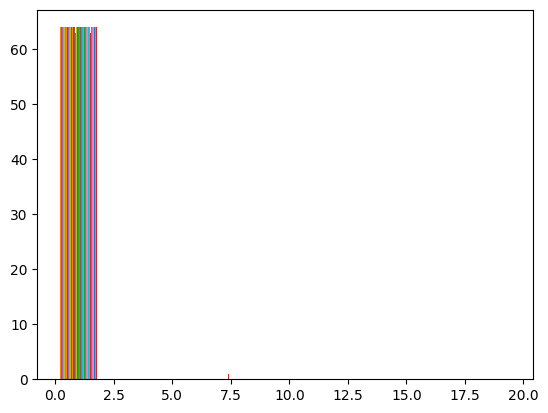

In [122]:
q = np.random.randint(0,len(normalized_images))
plt.hist(normalized_images[q])

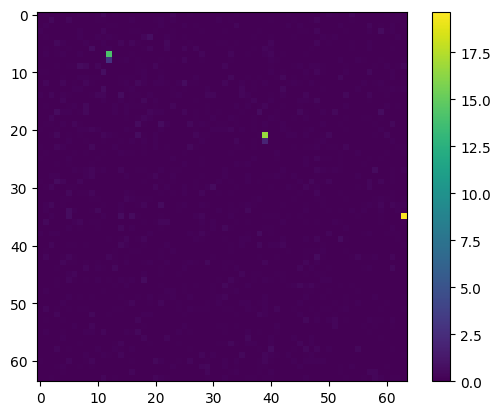

In [123]:
# i = np.random.randint(0, len(normalized_images))
i=2
plt.imshow(normalized_images[i])
plt.colorbar()

(array([7.636234e+06, 5.222330e+05, 1.525800e+04, 8.840000e+02,
        2.290000e+02, 3.960000e+02, 2.720000e+02, 4.120000e+02,
        3.040000e+02, 3.770000e+02, 4.090000e+02, 2.760000e+02,
        4.440000e+02, 2.730000e+02, 4.950000e+02, 3.020000e+02,
        4.650000e+02, 3.220000e+02, 5.090000e+02, 3.530000e+02,
        4.900000e+02, 4.380000e+02, 3.310000e+02, 3.990000e+02,
        2.570000e+02, 3.810000e+02, 1.980000e+02, 3.600000e+02,
        2.170000e+02, 2.990000e+02, 2.890000e+02, 1.790000e+02,
        2.840000e+02, 1.770000e+02, 2.780000e+02, 1.880000e+02,
        2.710000e+02, 1.920000e+02, 2.550000e+02, 1.830000e+02,
        2.340000e+02, 2.220000e+02, 1.680000e+02, 2.260000e+02,
        1.560000e+02, 2.410000e+02, 1.400000e+02, 2.070000e+02,
        1.300000e+02, 1.930000e+02, 1.630000e+02, 1.150000e+02,
        1.900000e+02, 1.170000e+02, 1.930000e+02, 1.220000e+02,
        1.350000e+02, 9.300000e+01, 1.390000e+02, 9.600000e+01,
        1.210000e+02, 1.110000e+02, 8.20

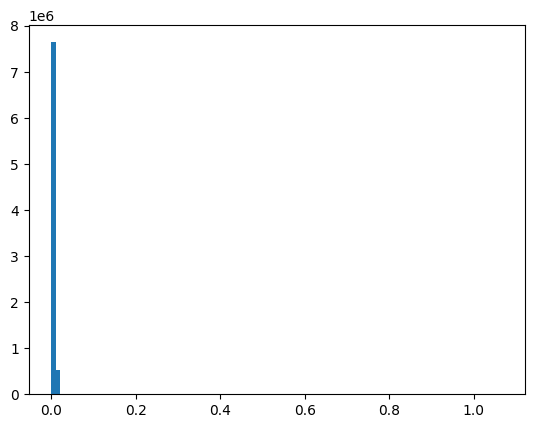

In [37]:
j = np.random.randint(0, len(normalized_images))
# j=2
plt.hist(normalized_images[:2000].flatten(),bins=100)

In [15]:
k = np.random.randint(0, len(normalized_midpoints))
# k =2
# normalized_centers[k], normalized_probabilities[k],normalized_midpoints[k]
normalized_centers

array([[[1.       , 0.0234375, 0.3515625],
        [1.       , 0.4765625, 0.9296875],
        [1.       , 0.3515625, 0.3359375]],

       [[1.       , 0.9140625, 0.1171875],
        [1.       , 0.4765625, 0.1796875],
        [1.       , 0.9765625, 0.7734375]],

       [[1.       , 0.1953125, 0.1171875],
        [1.       , 0.6171875, 0.3359375],
        [1.       , 0.9921875, 0.5546875]],

       ...,

       [[1.       , 0.8046875, 0.8515625],
        [1.       , 0.2890625, 0.5859375],
        [1.       , 0.3515625, 0.7421875]],

       [[1.       , 0.8203125, 0.6953125],
        [1.       , 0.6484375, 0.9453125],
        [1.       , 0.7890625, 0.7734375]],

       [[1.       , 0.3203125, 0.2890625],
        [1.       , 0.7265625, 0.9921875],
        [1.       , 0.1640625, 0.5703125]]])

In [15]:
from tensorflow.keras import layers


input_shape = (64, 64,1)
num_classes = 3
num_coordinates = 2


x_input = layers.Input(shape=input_shape)
#Layer 1
x = layers.Conv2D(128, kernel_size=3, padding='same', activation='relu')(x_input)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(256, kernel_size=3, padding='same', activation='relu')(x)
x = layers.MaxPool2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x) 


x = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(32, kernel_size=5, padding='same', activation='relu')(x)
x = layers.MaxPool2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x) 

x = layers.Flatten()(x)



x_prob = layers.Dense(num_classes,activation='sigmoid', name='x_prob')(x)
x_prob_reshape = layers.Reshape((-1, num_classes,1), name='x_probabilities_reshape')(x_prob)

x_midpoints = layers.Dense(num_classes * num_coordinates,activation='sigmoid', name='x_midpoints')(x)
x_midpoints_reshape = layers.Reshape((-1, num_classes, num_coordinates), name='x_midpoints_reshape')(x_midpoints)




model = tf.keras.models.Model(x_input,[x_prob_reshape,x_midpoints_reshape])
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5) 



In [16]:
import tensorflow as tf

def custom_mse(y_true, y_pred):
    # Ensuring both tensors are of dtype float64 for higher precision
    y_true = tf.cast(y_true, tf.float64)
    y_pred = tf.cast(y_pred, tf.float64)
    return tf.reduce_mean(tf.square(y_true - y_pred))



In [17]:
# model.compile(optimizer=optimizer, loss={'x_probabilities_reshape': tf.keras.losses.BinaryCrossentropy(), 'x_midpoints_reshape':tf.keras.losses.MeanSquaredError()})
model.compile(
    optimizer=optimizer, 
    loss={
        'x_probabilities_reshape': tf.keras.losses.BinaryCrossentropy(), 
        'x_midpoints_reshape': custom_mse  # Use the custom MSE function here
    }
)



In [24]:
val_images.shape,val_probabilities.shape,val_midpoints.shape

((10000, 64, 64), TensorShape([10000, 1, 3, 1]), TensorShape([10000, 1, 3, 2]))

In [25]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 64, 64, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 64, 64,    │      1,280 │ input_layer[0][0] │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 32, 32,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 32, 32,    │    295,168 │ max_pooling2d[0]… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 16, 16,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 16, 16,    │      1,024 │ max_pooling2d_1[… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 16, 16,    │          0 │ batch_normalizat… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 16, 16,    │    147,520 │ dropout[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 8, 8, 64)  │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 8, 8, 32)  │     51,232 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 4, 4, 32)  │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 4, 4, 32)  │        128 │ max_pooling2d_3[… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 4, 4, 32)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 512)       │          0 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ x_prob (Dense)      │ (None, 3)         │      1,539 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ x_midpoints (Dense) │ (None, 6)         │      3,078 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ x_probabilities_re… │ (None, 1, 3, 1)   │          0 │ x_prob[0][0]      │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ x_midpoints_reshape │ (None, 1, 3, 2)   │          0 │ x_midpoints[0][0] │
│ (Reshape)           │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴─────────────────

 Total params: 500,969 (1.91 MB)

 Trainable params: 500,393 (1.91 MB)

 Non-trainable params: 576 (2.25 KB)

In [18]:
from tensorflow.keras import layers, callbacks
# Custom callback to save the model every 10 epochs
class CustomModelCheckpoint(callbacks.Callback):
    def __init__(self, save_freq, save_path):
        super(CustomModelCheckpoint, self).__init__()
        self.save_freq = save_freq
        self.save_path = save_path

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.save_freq == 0:
            self.model.save(self.save_path.format(epoch=epoch + 1))
            print(f"Model saved at epoch {epoch + 1}")

save_freq = 100  # Save every 10 epochs
save_path = "/home/da886/ElectronCountingProject/Small Building Blocks/Weights for sorted/customlossmodel_epoch_{epoch:02d}.h5"
checkpoint_callback = CustomModelCheckpoint(save_freq=save_freq, save_path=save_path)

# Define the ReduceLROnPlateau callback
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',       # Monitor the validation loss
    factor=0.5,               # Factor by which the learning rate will be reduced
    patience=5,               # Number of epochs with no improvement after which learning rate will be reduced
    verbose=1,                # Verbosity mode, 1: output logs
    mode='min',               # Min mode, as we want to reduce the LR when the monitored quantity stops decreasing
    min_lr=3e-10               # Lower bound on the learning rate
)

In [19]:
history = model.fit(train_dataset, epochs=1500, validation_data=val_dataset,callbacks=[checkpoint_callback])
# history = model.fit(train_dataset, epochs=700, validation_data=val_dataset)

Epoch 1/1500


I0000 00:00:1723745224.733952  878817 service.cc:146] XLA service 0x7f947c006710 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1723745224.734020  878817 service.cc:154]   StreamExecutor device (0): NVIDIA A100 80GB PCIe, Compute Capability 8.0
2024-08-15 18:07:04.796790: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-15 18:07:05.090244: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-08-15 18:07:13.412476: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[2000,128,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[2000,256,32,32]{3,2,1,0}, f32[256,128,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"operation_queue_id":"0","wait_on_operation_

 1/20 ━━━━━━━━━━━━━━━━━━━━ 9:09 29s/step - loss: 1.0905

I0000 00:00:1723745251.802374  878817 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 399ms/step - loss: 0.9624 - val_loss: 0.7182
Epoch 2/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - loss: 0.5938 - val_loss: 0.7099
Epoch 3/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - loss: 0.3975 - val_loss: 0.7154
Epoch 4/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - loss: 0.2749 - val_loss: 0.7178
Epoch 5/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - loss: 0.2096 - val_loss: 0.7173
Epoch 6/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - loss: 0.1822 - val_loss: 0.7151
Epoch 7/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - loss: 0.1723 - val_loss: 0.7104
Epoch 8/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.1667 - val_loss: 0.7019
Epoch 9/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - loss: 0.1627 - val_loss: 0.6890
Epoch 10/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - loss: 0.1601 - val_loss: 0.6703
Epoch 11/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - loss: 0.1577 - val_loss: 0.6458
Epoch 12/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2

Model saved at epoch 100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - loss: 0.1209 - val_loss: 0.1072
Epoch 101/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.1207 - val_loss: 0.1071
Epoch 102/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.1206 - val_loss: 0.1070
Epoch 103/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.1205 - val_loss: 0.1069
Epoch 104/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.1204 - val_loss: 0.1069
Epoch 105/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.1202 - val_loss: 0.1069
Epoch 106/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.1199 - val_loss: 0.1067
Epoch 107/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.1198 - val_loss: 0.1066
Epoch 108/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - loss: 0.1195 - val_loss: 0.1066
Epoch 109/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.1195 - val_loss: 0.1065
Epoch 110/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.1193 - val_loss: 0.1063


Model saved at epoch 200
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - loss: 0.1086 - val_loss: 0.1015
Epoch 201/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.1084 - val_loss: 0.1015
Epoch 202/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.1084 - val_loss: 0.1014
Epoch 203/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.1083 - val_loss: 0.1017
Epoch 204/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.1082 - val_loss: 0.1017
Epoch 205/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - loss: 0.1083 - val_loss: 0.1019
Epoch 206/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.1081 - val_loss: 0.1021
Epoch 207/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 0.1080 - val_loss: 0.1018
Epoch 208/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.1079 - val_loss: 0.1015
Epoch 209/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.1079 - val_loss: 0.1017
Epoch 210/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.1078 - val_loss: 0.1016


Model saved at epoch 300
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - loss: 0.1013 - val_loss: 0.0992
Epoch 301/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - loss: 0.1012 - val_loss: 0.0996
Epoch 302/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.1012 - val_loss: 0.0996
Epoch 303/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - loss: 0.1011 - val_loss: 0.0992
Epoch 304/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.1009 - val_loss: 0.0993
Epoch 305/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 0.1010 - val_loss: 0.0989
Epoch 306/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 0.1009 - val_loss: 0.0987
Epoch 307/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.1010 - val_loss: 0.0992
Epoch 308/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.1008 - val_loss: 0.0995
Epoch 309/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 0.1007 - val_loss: 0.0994
Epoch 310/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.1008 - val_loss: 0.0995


Model saved at epoch 400
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - loss: 0.0967 - val_loss: 0.0958
Epoch 401/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 0.0967 - val_loss: 0.0957
Epoch 402/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - loss: 0.0966 - val_loss: 0.0965
Epoch 403/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0966 - val_loss: 0.0957
Epoch 404/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0966 - val_loss: 0.0954
Epoch 405/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0965 - val_loss: 0.0961
Epoch 406/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0965 - val_loss: 0.0953
Epoch 407/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0964 - val_loss: 0.0951
Epoch 408/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0966 - val_loss: 0.0955
Epoch 409/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0965 - val_loss: 0.0958
Epoch 410/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0964 - val_loss: 0.0959


Model saved at epoch 500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - loss: 0.0942 - val_loss: 0.0936
Epoch 501/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0942 - val_loss: 0.0937
Epoch 502/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 0.0942 - val_loss: 0.0935
Epoch 503/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - loss: 0.0941 - val_loss: 0.0938
Epoch 504/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 0.0941 - val_loss: 0.0936
Epoch 505/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0942 - val_loss: 0.0935
Epoch 506/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0943 - val_loss: 0.0936
Epoch 507/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0941 - val_loss: 0.0935
Epoch 508/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - loss: 0.0942 - val_loss: 0.0938
Epoch 509/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0941 - val_loss: 0.0934
Epoch 510/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - loss: 0.0941 - val_loss: 0.0944


Model saved at epoch 600
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - loss: 0.0928 - val_loss: 0.0930
Epoch 601/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0927 - val_loss: 0.0930
Epoch 602/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 0.0927 - val_loss: 0.0930
Epoch 603/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 0.0926 - val_loss: 0.0930
Epoch 604/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0926 - val_loss: 0.0930
Epoch 605/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - loss: 0.0927 - val_loss: 0.0930
Epoch 606/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 0.0927 - val_loss: 0.0931
Epoch 607/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0927 - val_loss: 0.0931
Epoch 608/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0926 - val_loss: 0.0933
Epoch 609/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - loss: 0.0928 - val_loss: 0.0936
Epoch 610/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0927 - val_loss: 0.0930


Model saved at epoch 700
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - loss: 0.0918 - val_loss: 0.0928
Epoch 701/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0918 - val_loss: 0.0928
Epoch 702/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - loss: 0.0917 - val_loss: 0.0928
Epoch 703/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - loss: 0.0918 - val_loss: 0.0928
Epoch 704/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - loss: 0.0916 - val_loss: 0.0929
Epoch 705/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - loss: 0.0918 - val_loss: 0.0928
Epoch 706/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - loss: 0.0918 - val_loss: 0.0928
Epoch 707/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0917 - val_loss: 0.0930
Epoch 708/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 0.0917 - val_loss: 0.0928
Epoch 709/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0917 - val_loss: 0.0933
Epoch 710/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - loss: 0.0917 - val_loss: 0.0928


Model saved at epoch 800
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 0.0911 - val_loss: 0.0928
Epoch 801/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 0.0910 - val_loss: 0.0928
Epoch 802/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - loss: 0.0910 - val_loss: 0.0928
Epoch 803/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - loss: 0.0909 - val_loss: 0.0928
Epoch 804/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0910 - val_loss: 0.0928
Epoch 805/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0910 - val_loss: 0.0929
Epoch 806/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 0.0909 - val_loss: 0.0929
Epoch 807/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0909 - val_loss: 0.0929
Epoch 808/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0909 - val_loss: 0.0929
Epoch 809/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0910 - val_loss: 0.0931
Epoch 810/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 0.0910 - val_loss: 0.0928


Model saved at epoch 900
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 0.0904 - val_loss: 0.0927
Epoch 901/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - loss: 0.0904 - val_loss: 0.0929
Epoch 902/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - loss: 0.0905 - val_loss: 0.0928
Epoch 903/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - loss: 0.0903 - val_loss: 0.0929
Epoch 904/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0904 - val_loss: 0.0928
Epoch 905/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - loss: 0.0902 - val_loss: 0.0928
Epoch 906/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0903 - val_loss: 0.0929
Epoch 907/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0904 - val_loss: 0.0928
Epoch 908/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - loss: 0.0904 - val_loss: 0.0929
Epoch 909/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0904 - val_loss: 0.0928
Epoch 910/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0905 - val_loss: 0.0929


Model saved at epoch 1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - loss: 0.0901 - val_loss: 0.0929
Epoch 1001/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0901 - val_loss: 0.0930
Epoch 1002/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - loss: 0.0899 - val_loss: 0.0929
Epoch 1003/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0899 - val_loss: 0.0929
Epoch 1004/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 0.0899 - val_loss: 0.0929
Epoch 1005/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0900 - val_loss: 0.0929
Epoch 1006/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0899 - val_loss: 0.0930
Epoch 1007/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0899 - val_loss: 0.0931
Epoch 1008/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0899 - val_loss: 0.0930
Epoch 1009/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0899 - val_loss: 0.0929
Epoch 1010/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0899 - val_lo

Model saved at epoch 1100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - loss: 0.0895 - val_loss: 0.0930
Epoch 1101/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0895 - val_loss: 0.0931
Epoch 1102/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0895 - val_loss: 0.0930
Epoch 1103/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0896 - val_loss: 0.0930
Epoch 1104/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0895 - val_loss: 0.0930
Epoch 1105/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - loss: 0.0895 - val_loss: 0.0930
Epoch 1106/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - loss: 0.0896 - val_loss: 0.0929
Epoch 1107/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0895 - val_loss: 0.0929
Epoch 1108/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0895 - val_loss: 0.0931
Epoch 1109/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0895 - val_loss: 0.0931
Epoch 1110/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0895 - val_lo

Model saved at epoch 1200
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - loss: 0.0891 - val_loss: 0.0930
Epoch 1201/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0892 - val_loss: 0.0930
Epoch 1202/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0892 - val_loss: 0.0930
Epoch 1203/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - loss: 0.0891 - val_loss: 0.0931
Epoch 1204/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0893 - val_loss: 0.0930
Epoch 1205/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0892 - val_loss: 0.0932
Epoch 1206/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0892 - val_loss: 0.0931
Epoch 1207/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0891 - val_loss: 0.0932
Epoch 1208/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0893 - val_loss: 0.0930
Epoch 1209/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0892 - val_loss: 0.0932
Epoch 1210/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0892 - val_lo

Model saved at epoch 1300
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - loss: 0.0889 - val_loss: 0.0932
Epoch 1301/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0889 - val_loss: 0.0930
Epoch 1302/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0889 - val_loss: 0.0934
Epoch 1303/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0890 - val_loss: 0.0930
Epoch 1304/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0889 - val_loss: 0.0931
Epoch 1305/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0889 - val_loss: 0.0931
Epoch 1306/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - loss: 0.0889 - val_loss: 0.0932
Epoch 1307/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - loss: 0.0889 - val_loss: 0.0931
Epoch 1308/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0890 - val_loss: 0.0931
Epoch 1309/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - loss: 0.0889 - val_loss: 0.0933
Epoch 1310/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - loss: 0.0889 - val_lo

Model saved at epoch 1400
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - loss: 0.0887 - val_loss: 0.0931
Epoch 1401/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - loss: 0.0886 - val_loss: 0.0932
Epoch 1402/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 0.0887 - val_loss: 0.0932
Epoch 1403/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - loss: 0.0887 - val_loss: 0.0932
Epoch 1404/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0887 - val_loss: 0.0932
Epoch 1405/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0887 - val_loss: 0.0934
Epoch 1406/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - loss: 0.0886 - val_loss: 0.0933
Epoch 1407/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0888 - val_loss: 0.0932
Epoch 1408/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0886 - val_loss: 0.0932
Epoch 1409/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0887 - val_loss: 0.0932
Epoch 1410/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - loss: 0.0887 - val_lo

Model saved at epoch 1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 0.0885 - val_loss: 0.0933


dict_keys(['loss', 'val_loss'])


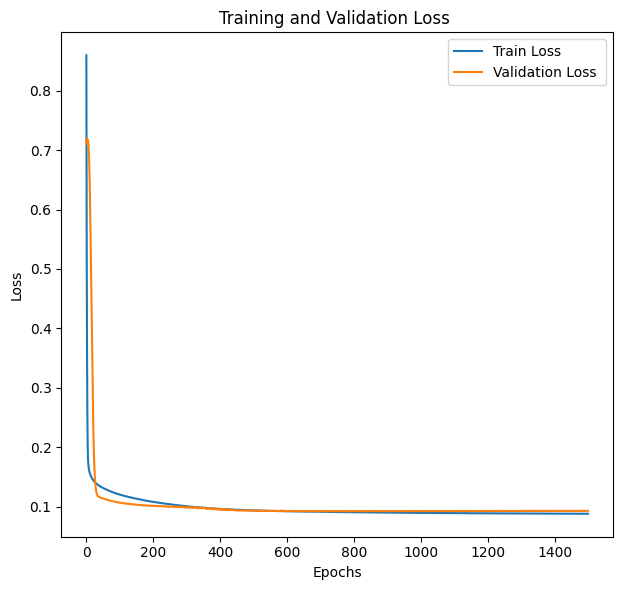

In [20]:


# Print the available keys in the history
print(history.history.keys())

# Extract the losses from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# If there are specific losses for x_prob and x_midpoints, extract them
train_loss_x_prob = history.history.get('x_prob_reshape_loss', train_loss)
val_loss_x_prob = history.history.get('val_x_prob_reshape_loss', val_loss)
train_loss_x_midpoints = history.history.get('x_midpoints_reshape_loss', train_loss)
val_loss_x_midpoints = history.history.get('val_x_midpoints_reshape_loss', val_loss)


# Plot the training and validation losses
plt.figure(figsize=(12, 6))

# Plotting x_prob_reshape loss
plt.subplot(1, 2,1)
plt.plot(train_loss_x_prob, label='Train Loss ')
plt.plot(val_loss_x_prob, label='Validation Loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss ')
plt.legend()

# # Plotting x_midpoints_reshape loss
# plt.subplot(1, 2, 2)
# plt.plot(train_loss_x_midpoints, label='Train Loss x_midpoints_reshape')
# plt.plot(val_loss_x_midpoints, label='Validation Loss x_midpoints_reshape')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Training and Validation Loss for x_midpoints_reshape')
# plt.legend()

plt.tight_layout()
plt.show()


In [40]:
# train_dataset = tf.data.Dataset.from_tensor_slices((train_images, {'x_probabilities_reshape':train_probabilities,'x_midpoints_reshape':train_midpoints}))
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, {'x_probabilities_reshape':val_probabilities,'x_midpoints_reshape':val_midpoints,}))

# train_dataset = train_dataset.batch(400)
# val_dataset = dataset.take(val_size)
# val_dataset = dataset.skip(train_size)
val_dataset = val_dataset.batch(400)
# inputs,targets = next(iter(train_dataset))
inputs,targets = next(iter(val_dataset))
output =model.predict(inputs)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [41]:
h = np.random.randint(0,len(output))
output[1][h],targets['x_midpoints_reshape'][h]

(array([[[0.40888742, 0.11645953],
         [0.5514803 , 0.36273575],
         [0.34002614, 0.9211784 ]]], dtype=float32),
 <tf.Tensor: shape=(1, 3, 2), dtype=float64, numpy=
 array([[[0.3984375, 0.0859375],
         [0.6640625, 0.3203125],
         [0.3828125, 0.9296875]]])>)

In [42]:
import tensorflow as tf

# r = np.random.randint(0,100)
tensor1 = tf.constant(targets['x_midpoints_reshape'], dtype=tf.float64)

tensor2 = tf.constant(output[1], dtype=tf.float32)


tensor2 = tf.cast(tensor2, tf.float64)


mse_loss_fn = tf.keras.losses.MeanSquaredError()
mse_loss = mse_loss_fn(tensor1, tensor2)

print("MSE Loss:", mse_loss.numpy())

MSE Loss: 0.015028333


Train dataset

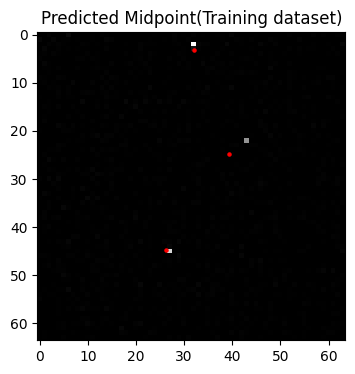

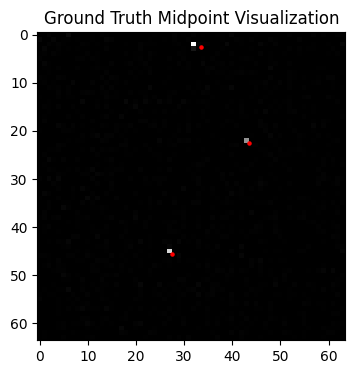

In [39]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_midpoints(image, probability_vector, midpoints, threshold=0.8):
    """
    Visualizes midpoints on an image based on a probability vector.

    Parameters:
    - image: A 3D tensor representing the image.
    - probability_vector: A 1D tensor representing the probabilities associated with midpoints.
    - midpoints: A 2D tensor representing the midpoint coordinates (x, y).
    - threshold: Probability threshold for visualization.

    Returns:
    None (displays the image with midpoints).
    """
    # Convert to NumPy arrays for easier handling
    image_np = image
    prob_vector_np = probability_vector
    midpoints_np = midpoints#.numpy() if hasattr(midpoints, 'numpy') else midpoints

    # Denormalize image if necessary (adjust based on your normalization method)
    denormalized_image = image_np  # Modify if normalization was applied during training

    # Visualize the image
    plt.figure(figsize=(4, 4))
    plt.imshow(denormalized_image, cmap='gray')
    plt.title("Predicted Midpoint(Training dataset)")

    # Plot midpoints based on probability threshold
    for i, (p,u) in enumerate(midpoints_np):
        prob = prob_vector_np[i]
        if prob > threshold:
            plt.scatter(p, u, color='red', s=5)
            # if i == 0:  # Add label only once to avoid repetition in the legend
            #     plt.legend()
    
    

t = np.random.randint(0,400)
# t=12
visualize_midpoints(tf.convert_to_tensor(inputs[t]), train_probabilities[t].numpy().squeeze()*64, tf.convert_to_tensor(output[1][t,0,:,:])*[64,64]) ##myprediction   
         
            
def visualize_midpoints2(image, probability_vector, midpoints, threshold=0.8):
    """
    Visualizes midpoints on an image based on a probability vector.

    Parameters:
    - image: A 3D tensor representing the image.
    - probability_vector: A 1D tensor representing the probabilities associated with midpoints.
    - midpoints: A 2D tensor representing the midpoint coordinates (x, y).
    - threshold: Probability threshold for visualization.

    Returns:
    None (displays the image with midpoints).
    """
    # Convert to NumPy arrays for easier handling
    image_np = image
    prob_vector_np = probability_vector
    midpoints_np = midpoints#.numpy() if hasattr(midpoints, 'numpy') else midpoints

    # Denormalize image if necessary (adjust based on your normalization method)
    denormalized_image = image_np  # Modify if normalization was applied during training

    # Visualize the image
    plt.figure(figsize=(4, 4))
    plt.imshow(denormalized_image, cmap='gray')
    plt.title("Ground Truth Midpoint Visualization")

    # Plot midpoints based on probability threshold
    for i, (x,y) in enumerate(midpoints_np):
        prob = prob_vector_np[i]
        if prob > threshold:
            plt.scatter(x, y, color='red', s=5)
            # if i == 0:  # Add label only once to avoid repetition in the legend
            #     plt.legend()

    plt.show()     
visualize_midpoints2(tf.convert_to_tensor(inputs[t]), train_probabilities[t].numpy().squeeze()*64, tf.convert_to_tensor(targets['x_midpoints_reshape'][t,0,:,:])*[64,64]) ##ground truth
# visualize_midpoints2(tf.convert_to_tensor(images_np[t]), probabilities[t].numpy().squeeze(), tf.convert_to_tensor(center_coordinates_np[t,0,:,:])*[64,64])          




Validation dataset

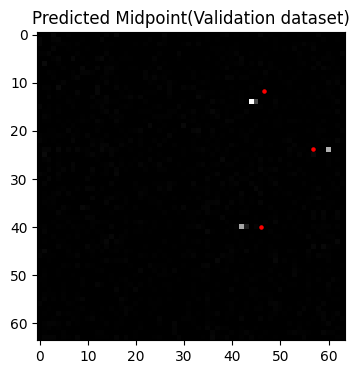

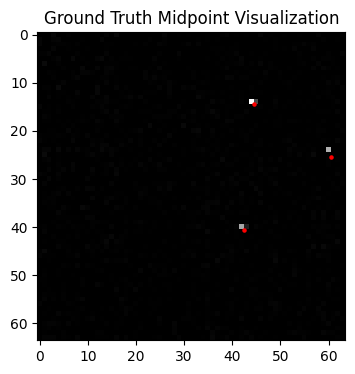

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_midpoints(image, probability_vector, midpoints, threshold=0.8):
    """
    Visualizes midpoints on an image based on a probability vector.

    Parameters:
    - image: A 3D tensor representing the image.
    - probability_vector: A 1D tensor representing the probabilities associated with midpoints.
    - midpoints: A 2D tensor representing the midpoint coordinates (x, y).
    - threshold: Probability threshold for visualization.

    Returns:
    None (displays the image with midpoints).
    """
    # Convert to NumPy arrays for easier handling
    image_np = image
    prob_vector_np = probability_vector
    midpoints_np = midpoints#.numpy() if hasattr(midpoints, 'numpy') else midpoints

    # Denormalize image if necessary (adjust based on your normalization method)
    denormalized_image = image_np  # Modify if normalization was applied during training

    # Visualize the image
    plt.figure(figsize=(4, 4))
    plt.imshow(denormalized_image, cmap='gray')
    plt.title("Predicted Midpoint(Validation dataset)")

    # Plot midpoints based on probability threshold
    for i, (p,u) in enumerate(midpoints_np):
        prob = prob_vector_np[i]
        if prob > threshold:
            plt.scatter(p, u, color='red', s=5)
            # if i == 0:  # Add label only once to avoid repetition in the legend
            #     plt.legend()
    
    

t = np.random.randint(0,400)
# t=12
visualize_midpoints(tf.convert_to_tensor(inputs[t]), output[0][t].squeeze()*64, tf.convert_to_tensor(output[1][t,0,:,:])*[64,64]) ##myprediction   
         
            
def visualize_midpoints2(image, probability_vector, midpoints, threshold=0.8):
    """
    Visualizes midpoints on an image based on a probability vector.

    Parameters:
    - image: A 3D tensor representing the image.
    - probability_vector: A 1D tensor representing the probabilities associated with midpoints.
    - midpoints: A 2D tensor representing the midpoint coordinates (x, y).
    - threshold: Probability threshold for visualization.

    Returns:
    None (displays the image with midpoints).
    """
    # Convert to NumPy arrays for easier handling
    image_np = image
    prob_vector_np = probability_vector
    midpoints_np = midpoints#.numpy() if hasattr(midpoints, 'numpy') else midpoints

    # Denormalize image if necessary (adjust based on your normalization method)
    denormalized_image = image_np  # Modify if normalization was applied during training

    # Visualize the image
    plt.figure(figsize=(4, 4))
    plt.imshow(denormalized_image, cmap='gray')
    plt.title("Ground Truth Midpoint Visualization")

    # Plot midpoints based on probability threshold
    for i, (x,y) in enumerate(midpoints_np):
        prob = prob_vector_np[i]
        if prob > threshold:
            plt.scatter(x, y, color='red', s=5)
            # if i == 0:  # Add label only once to avoid repetition in the legend
            #     plt.legend()

    plt.show()     
visualize_midpoints2(tf.convert_to_tensor(inputs[t]), targets['x_probabilities_reshape'][t].numpy().squeeze()*64, tf.convert_to_tensor(targets['x_midpoints_reshape'][t,0,:,:])*[64,64]) ##ground truth
# visualize_midpoints2(tf.convert_to_tensor(images_np[t]), probabilities[t].numpy().squeeze(), tf.convert_to_tensor(center_coordinates_np[t,0,:,:])*[64,64])          




In [48]:
model.save("/home/da886/ElectronCountingProject/Small Building Blocks/Weights for sorted/customlossmodel.h5")